In [125]:
import os

# Convert the Windows path to a WSL path
windows_path = r"D:\Google Drive\HCSS Projects - trash\HCSS Projects\Resilience - Progress 2022\Ukrainian"
wsl_path = windows_path.replace("\\", "/").replace("D:", "/mnt/d")

# Change the working directory
os.chdir(wsl_path)


In [126]:
import chardet
import json
import pandas as pd
from tqdm.auto import tqdm

In [127]:
#Create an empty list to store the data frames
data_frames = []

# # Get the list of JSON files
json_files = [filename for filename in os.listdir() if filename.endswith(".json")]

# # Loop through the files in the directory using tqdm
for filename in tqdm(json_files):
#     # Detect the encoding of the file
     with open(filename, 'rb') as f:
         result = chardet.detect(f.read())
#     # Load the file into a Python dictionary
     with open(filename, encoding=result['encoding']) as f:
         data = json.load(f)
#     # Check if the 'record' key is present
     if 'record' in data:
#         # Convert the dictionary to a data frame
         df = pd.DataFrame(data['record'])
#         # Add the data frame to the list of data frames
         data_frames.append(df)
     else:
         print("Key 'record' not found in file '{}'".format(filename))

# # Concatenate the list of data frames into a single data frame
df = pd.concat(data_frames)

# # Show the head of the data frame
print(df.head())


  0%|          | 0/18 [00:00<?, ?it/s]

                                                                         name   
0                  У Тростянці знайшли докази планів рф окупувати всю Україну  \
1  Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні   
2                                                         Пушкіна убив путін.   
3   Війська рф здійснювали інтенсивні обстріли на сході та півдні України ОВА   
4                               По Запоріжжю рашисти вгатили крилатою ракетою   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              fulltext   
0  У Тр

In [128]:
# Before removing entries
print("Before removing entries lacking text:")
df.info()

# Removing entries lacking text
df = df[df.fulltext.notna()].reset_index(drop=True)

# After removing entries
print("\nAfter removing entries lacking text:")
df.info()

Before removing entries lacking text:
<class 'pandas.core.frame.DataFrame'>
Index: 15600 entries, 0 to 639
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      15600 non-null  object
 1   fulltext  15600 non-null  object
 2   database  15564 non-null  object
 3   source    15564 non-null  object
 4   date      15564 non-null  object
 5   issue     15564 non-null  object
dtypes: object(6)
memory usage: 853.1+ KB

After removing entries lacking text:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15600 entries, 0 to 15599
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      15600 non-null  object
 1   fulltext  15600 non-null  object
 2   database  15564 non-null  object
 3   source    15564 non-null  object
 4   date      15564 non-null  object
 5   issue     15564 non-null  object
dtypes: object(6)
memory usage: 731.4+ KB


In [129]:
pd.options.display.max_colwidth = 500
print(df['fulltext'].head(20))

0     У Тростянці знайшли докази планів рф окупувати всю Україну\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 11.05.2022\nЗаглавие: У Тростянці знайшли докази планів рф окупувати всю Україну\nУ Тростянці знайшли докази планів рф окупувати всю Україну\nОлена ЧЕРКАСЕЦЬ\nСлідчі ДБР виявили документи, у яких були докази, що росія мала наміри захопити всю Україну (Фото ДБР)\nСлідчі Державного бюро розслідувань у Тростянці, що на Сумщині, знайшли документи російських військ...
1     Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 11.05.2022\nЗаглавие: Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні\nРосія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні\nОлена ЧЕРКАСЕЦЬ\nРашисти звинувачують виробників вакцин у співпраці з Украною\nНачальник військ радіаційного, хімічного та біологічного захисту Збройних сил Росії І

In [130]:
import os

# Create the subdirectory if it doesn't exist
subdirectory = '230528'
if not os.path.exists(subdirectory):
    os.makedirs(subdirectory)

# Define the file path within the subdirectory
file_path = os.path.join(subdirectory, 'Integrum resilience Ukrainian.json')

# Write out the Pandas DataFrame as a JSON file
df.to_json(file_path, orient='records', lines=True, force_ascii=False)

In [131]:
import pandas as pd

# Read the JSON file into a DataFrame
file_path = '230528/Integrum resilience Ukrainian.json'
df = pd.read_json(file_path, lines=True)

# Now you can use the 'df' DataFrame with the 'date' column converted to datetime

/tmp/ipykernel_22454/556630916.py:5: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df = pd.read_json(file_path, lines=True)
/tmp/ipykernel_22454/556630916.py:5: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df = pd.read_json(file_path, lines=True)
/tmp/ipykernel_22454/556630916.py:5: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To 

In [132]:
import pandas as pd
import re
from tqdm.auto import tqdm

# Define the patterns
source_pattern = '\nИсточник: '
date_pattern = '\nДата выпуска: '
title_pattern = '\nЗаглавие: '

# Create new columns
df['source'] = ''
df['date'] = ''
df['title'] = ''

# Process each row
for i, row in tqdm(df.iterrows(), total=df.shape[0]):
    fulltext = row['fulltext']

    source_search = re.search(source_pattern + r'(.*?)\n', fulltext, re.DOTALL)
    if source_search:
        df.at[i, 'source'] = source_search.group(1).strip()
        df.at[i, 'fulltext'] = fulltext.replace(source_pattern + df.at[i, 'source'], '')

    date_search = re.search(date_pattern + r'(.*?)\n', fulltext, re.DOTALL)
    if date_search:
        df.at[i, 'date'] = date_search.group(1).strip()
        df.at[i, 'fulltext'] = fulltext.replace(date_pattern + df.at[i, 'date'], '')

    title_search = re.search(title_pattern + r'(.*?)\n', fulltext, re.DOTALL)
    if title_search:
        df.at[i, 'title'] = title_search.group(1).strip()
        df.at[i, 'fulltext'] = fulltext.replace(title_pattern + df.at[i, 'title'], '')

# Print the data
print(df)

  0%|          | 0/15600 [00:00<?, ?it/s]

                                                                             name   
0                      У Тростянці знайшли докази планів рф окупувати всю Україну  \
1      Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні   
2                                                             Пушкіна убив путін.   
3       Війська рф здійснювали інтенсивні обстріли на сході та півдні України ОВА   
4                                   По Запоріжжю рашисти вгатили крилатою ракетою   
...                                                                           ...   
15595                                             В Україні створять рейтинг шкіл   
15596                                                 Кати у міліцейських погонах   
15597                                                                  Офiцiйно .   
15598                                                   Офіційно РОЗПОРЯДЖЕННЯ N3   
15599                                              Що подарує Таб

In [133]:
df.head()

,name,fulltext,database,source,date,issue,title
0,У Тростянці знайшли докази планів рф окупувати всю Україну,"У Тростянці знайшли докази планів рф окупувати всю Україну\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 11.05.2022\nУ Тростянці знайшли докази планів рф окупувати всю Україну\nОлена ЧЕРКАСЕЦЬ\nСлідчі ДБР виявили документи, у яких були докази, що росія мала наміри захопити всю Україну (Фото ДБР)\nСлідчі Державного бюро розслідувань у Тростянці, що на Сумщині, знайшли документи російських військових, що свідчать про наміри РФ захопити всю Україну.\nЯк інформує Укр...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",11.05.2022,11 мая,У Тростянці знайшли докази планів рф окупувати всю Україну
1,Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні,"Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 11.05.2022\nРосія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні\nОлена ЧЕРКАСЕЦЬ\nРашисти звинувачують виробників вакцин у співпраці з Украною\nНачальник військ радіаційного, хімічного та біологічного захисту Збройних сил Росії Ігор Кирилов заявив, що американські виробники вакцини від коронавірусу Pfizer та Moderna були ...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",11.05.2022,11 мая,Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні
2,Пушкіна убив путін.,"Коли депутати нарешті виженуть із Києва російський дух\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 12.05.2022\nПушкіна убив путін. Коли депутати нарешті виженуть із Києва російський дух\nВалентина САМЧЕНКО\nКиїв уповільнив темпи очищення від нашарувань російської пропаганди. Колаж Валентини Самченко\nЩе три місяці тому більшості українців не боліло, коли вони йшли вулицею Пушкіна чи Московською і виходили у київському метро на ""Льва Толстого"".\nА кiлька років т...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",12.05.2022,12 мая,Пушкіна убив путін. Коли депутати нарешті виженуть із Києва російський дух
3,Війська рф здійснювали інтенсивні обстріли на сході та півдні України ОВА,"Війська рф здійснювали інтенсивні обстріли на сході та півдні України - ОВА\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 12.05.2022\nВійська рф здійснювали інтенсивні обстріли на сході та півдні України - ОВА\nТарас ЗДОРОВИЛО\nОкупанти гатили по багатьох областях України.\nРосійські окупаційні війська активно обстрілюють схід та південь України, штурмують Донеччину, усі спроби наступу росіян на Ізюмському напрямку відбито, через обстріли на Херсонщині вирують по...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",12.05.2022,12 мая,Війська рф здійснювали інтенсивні обстріли на сході та півдні України - ОВА
4,По Запоріжжю рашисти вгатили крилатою ракетою,"Источник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 12.05.2022\nПо Запоріжжю рашисти вгатили крилатою ракетою\nТарас ЗДОРОВИЛО\nЗапоріжжя отримало ""подарунок"" від російських окупантів - крилату ракету.\nКрилату ракету російські окупанти запустили по Запоріжжю, наразі горить приватна будівля.\nЯк інформує УМ, про це 12 травня в Телеграмі повідомили в Запорізькій обласній військовій адміністрації.\n""Сьогодні, 12 травня, близько 10:00 російські війська запустили крилату ра...",Зарубежные интернет-издания,,12.05.2022,12 мая,По Запоріжжю рашисти вгатили крилатою ракетою


In [134]:
# create a new column for cleaned fulltext
df['fulltext_clean'] = df['fulltext']

# remove the extracted strings along with the labels
df['fulltext_clean'] = df.apply(lambda row: row['fulltext_clean'].replace(f'\nИсточник: {row["source"]}\n', '\n'), axis=1)
df['fulltext_clean'] = df.apply(lambda row: row['fulltext_clean'].replace(f'\nДата выпуска: {row["date"]}\n', '\n'), axis=1)
df['fulltext_clean'] = df.apply(lambda row: row['fulltext_clean'].replace(f'\nЗаглавие: {row["title"]}\n', '\n'), axis=1)

# Print the data
print(df)

                                                                             name   
0                      У Тростянці знайшли докази планів рф окупувати всю Україну  \
1      Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні   
2                                                             Пушкіна убив путін.   
3       Війська рф здійснювали інтенсивні обстріли на сході та півдні України ОВА   
4                                   По Запоріжжю рашисти вгатили крилатою ракетою   
...                                                                           ...   
15595                                             В Україні створять рейтинг шкіл   
15596                                                 Кати у міліцейських погонах   
15597                                                                  Офiцiйно .   
15598                                                   Офіційно РОЗПОРЯДЖЕННЯ N3   
15599                                              Що подарує Таб

In [135]:
df.head()

,name,fulltext,database,source,date,issue,title,fulltext_clean
0,У Тростянці знайшли докази планів рф окупувати всю Україну,"У Тростянці знайшли докази планів рф окупувати всю Україну\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 11.05.2022\nУ Тростянці знайшли докази планів рф окупувати всю Україну\nОлена ЧЕРКАСЕЦЬ\nСлідчі ДБР виявили документи, у яких були докази, що росія мала наміри захопити всю Україну (Фото ДБР)\nСлідчі Державного бюро розслідувань у Тростянці, що на Сумщині, знайшли документи російських військових, що свідчать про наміри РФ захопити всю Україну.\nЯк інформує Укр...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",11.05.2022,11 мая,У Тростянці знайшли докази планів рф окупувати всю Україну,"У Тростянці знайшли докази планів рф окупувати всю Україну\nУ Тростянці знайшли докази планів рф окупувати всю Україну\nОлена ЧЕРКАСЕЦЬ\nСлідчі ДБР виявили документи, у яких були докази, що росія мала наміри захопити всю Україну (Фото ДБР)\nСлідчі Державного бюро розслідувань у Тростянці, що на Сумщині, знайшли документи російських військових, що свідчать про наміри РФ захопити всю Україну.\nЯк інформує Україна молода, про це повідомляє пресслужба ДБР у Телеграмі.\nДиректор Бюро Олексій Суха..."
1,Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні,"Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 11.05.2022\nРосія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні\nОлена ЧЕРКАСЕЦЬ\nРашисти звинувачують виробників вакцин у співпраці з Украною\nНачальник військ радіаційного, хімічного та біологічного захисту Збройних сил Росії Ігор Кирилов заявив, що американські виробники вакцини від коронавірусу Pfizer та Moderna були ...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",11.05.2022,11 мая,Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні,"Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні\nРосія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні\nОлена ЧЕРКАСЕЦЬ\nРашисти звинувачують виробників вакцин у співпраці з Украною\nНачальник військ радіаційного, хімічного та біологічного захисту Збройних сил Росії Ігор Кирилов заявив, що американські виробники вакцини від коронавірусу Pfizer та Moderna були залучені до військово-біологічної діяльності США в Україні.\nЯк інформує Україна молод..."
2,Пушкіна убив путін.,"Коли депутати нарешті виженуть із Києва російський дух\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 12.05.2022\nПушкіна убив путін. Коли депутати нарешті виженуть із Києва російський дух\nВалентина САМЧЕНКО\nКиїв уповільнив темпи очищення від нашарувань російської пропаганди. Колаж Валентини Самченко\nЩе три місяці тому більшості українців не боліло, коли вони йшли вулицею Пушкіна чи Московською і виходили у київському метро на ""Льва Толстого"".\nА кiлька років т...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",12.05.2022,12 мая,Пушкіна убив путін. Коли депутати нарешті виженуть із Києва російський дух,"Коли депутати нарешті виженуть із Києва російський дух\nПушкіна убив путін. Коли депутати нарешті виженуть із Києва російський дух\nВалентина САМЧЕНКО\nКиїв уповільнив темпи очищення від нашарувань російської пропаганди. Колаж Валентини Самченко\nЩе три місяці тому більшості українців не боліло, коли вони йшли вулицею Пушкіна чи Московською і виходили у київському метро на ""Льва Толстого"".\nА кiлька років тому, у новорічному привітанні із 2020-м, взагалі перша особа країни казала: ""неважливо..."
3,Війська рф здійснювали інтенсивні обстріли на сході та півдні України ОВА,"Війська рф здійснювали інтенсивні обстріли на сході та півдні України - ОВА\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 12.05.2022\nВійська рф здійснюва

In [136]:
def remove_before_title(row):
    for _ in range(2):  # Repeat the process twice
        try:
            # Find the position where the title occurs in the text
            idx = row['fulltext_clean'].index(row['title'])
            # Remove everything before and including the title and the following newline
            row['fulltext_clean'] = row['fulltext_clean'][idx+len(row['title'])+1:]
        except ValueError:
            # If the title is not found in the text, break the loop
            break
    return row['fulltext_clean']

# Apply the function to each row of the DataFrame
df['fulltext_clean'] = df.apply(remove_before_title, axis=1)

# Print the data
print(df)

                                                                             name   
0                      У Тростянці знайшли докази планів рф окупувати всю Україну  \
1      Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні   
2                                                             Пушкіна убив путін.   
3       Війська рф здійснювали інтенсивні обстріли на сході та півдні України ОВА   
4                                   По Запоріжжю рашисти вгатили крилатою ракетою   
...                                                                           ...   
15595                                             В Україні створять рейтинг шкіл   
15596                                                 Кати у міліцейських погонах   
15597                                                                  Офiцiйно .   
15598                                                   Офіційно РОЗПОРЯДЖЕННЯ N3   
15599                                              Що подарує Таб

In [137]:
df.head()

,name,fulltext,database,source,date,issue,title,fulltext_clean
0,У Тростянці знайшли докази планів рф окупувати всю Україну,"У Тростянці знайшли докази планів рф окупувати всю Україну\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 11.05.2022\nУ Тростянці знайшли докази планів рф окупувати всю Україну\nОлена ЧЕРКАСЕЦЬ\nСлідчі ДБР виявили документи, у яких були докази, що росія мала наміри захопити всю Україну (Фото ДБР)\nСлідчі Державного бюро розслідувань у Тростянці, що на Сумщині, знайшли документи російських військових, що свідчать про наміри РФ захопити всю Україну.\nЯк інформує Укр...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",11.05.2022,11 мая,У Тростянці знайшли докази планів рф окупувати всю Україну,"Олена ЧЕРКАСЕЦЬ\nСлідчі ДБР виявили документи, у яких були докази, що росія мала наміри захопити всю Україну (Фото ДБР)\nСлідчі Державного бюро розслідувань у Тростянці, що на Сумщині, знайшли документи російських військових, що свідчать про наміри РФ захопити всю Україну.\nЯк інформує Україна молода, про це повідомляє пресслужба ДБР у Телеграмі.\nДиректор Бюро Олексій Сухачов повідомив, що співробітники Державного бюро розслідувань (ДБР) продовжують документувати факти злочинів, скоєних вій..."
1,Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні,"Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 11.05.2022\nРосія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні\nОлена ЧЕРКАСЕЦЬ\nРашисти звинувачують виробників вакцин у співпраці з Украною\nНачальник військ радіаційного, хімічного та біологічного захисту Збройних сил Росії Ігор Кирилов заявив, що американські виробники вакцини від коронавірусу Pfizer та Moderna були ...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",11.05.2022,11 мая,Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні,"Олена ЧЕРКАСЕЦЬ\nРашисти звинувачують виробників вакцин у співпраці з Украною\nНачальник військ радіаційного, хімічного та біологічного захисту Збройних сил Росії Ігор Кирилов заявив, що американські виробники вакцини від коронавірусу Pfizer та Moderna були залучені до військово-біологічної діяльності США в Україні.\nЯк інформує Україна молода, про це передає ТАСС.\n""Україна стає полігоном західних країн для створення компонентів біологічної зброї та тестування нових зразків фармпрепаратів"",..."
2,Пушкіна убив путін.,"Коли депутати нарешті виженуть із Києва російський дух\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 12.05.2022\nПушкіна убив путін. Коли депутати нарешті виженуть із Києва російський дух\nВалентина САМЧЕНКО\nКиїв уповільнив темпи очищення від нашарувань російської пропаганди. Колаж Валентини Самченко\nЩе три місяці тому більшості українців не боліло, коли вони йшли вулицею Пушкіна чи Московською і виходили у київському метро на ""Льва Толстого"".\nА кiлька років т...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",12.05.2022,12 мая,Пушкіна убив путін. Коли депутати нарешті виженуть із Києва російський дух,"Валентина САМЧЕНКО\nКиїв уповільнив темпи очищення від нашарувань російської пропаганди. Колаж Валентини Самченко\nЩе три місяці тому більшості українців не боліло, коли вони йшли вулицею Пушкіна чи Московською і виходили у київському метро на ""Льва Толстого"".\nА кiлька років тому, у новорічному привітанні із 2020-м, взагалі перша особа країни казала: ""неважливо як названа вулиця"" та ""немає різниці, біля якого пам’ятника ти чекаєш на дівчину"".\nУсвідомлене розуміння важливості українського п..."
3,Війська рф здійснювали інтенсивні обстріли на сході та півдні України ОВА,"Війська рф здійснювали інтенсивні обстріли на сході та півдні України - ОВА\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 12.05.2022\nВійська рф здій

In [138]:
# !pip install regex

In [139]:
import pandas as pd

# Define the function to extract and remove author's name
def extract_and_remove_author(text):
    lines = text.split('\n')
    author_line = lines[0].strip()  # Extract the author's name
    remaining_text = '\n'.join(lines[1:])  # Get the remaining text
    return author_line, remaining_text

# Apply the function to the 'fulltext_clean' column
df['author'], df['fulltext_clean'] = zip(*df['fulltext_clean'].apply(extract_and_remove_author))

print(df)

                                                                             name   
0                      У Тростянці знайшли докази планів рф окупувати всю Україну  \
1      Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні   
2                                                             Пушкіна убив путін.   
3       Війська рф здійснювали інтенсивні обстріли на сході та півдні України ОВА   
4                                   По Запоріжжю рашисти вгатили крилатою ракетою   
...                                                                           ...   
15595                                             В Україні створять рейтинг шкіл   
15596                                                 Кати у міліцейських погонах   
15597                                                                  Офiцiйно .   
15598                                                   Офіційно РОЗПОРЯДЖЕННЯ N3   
15599                                              Що подарує Таб

In [140]:
df.head()

,name,fulltext,database,source,date,issue,title,fulltext_clean,author
0,У Тростянці знайшли докази планів рф окупувати всю Україну,"У Тростянці знайшли докази планів рф окупувати всю Україну\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 11.05.2022\nУ Тростянці знайшли докази планів рф окупувати всю Україну\nОлена ЧЕРКАСЕЦЬ\nСлідчі ДБР виявили документи, у яких були докази, що росія мала наміри захопити всю Україну (Фото ДБР)\nСлідчі Державного бюро розслідувань у Тростянці, що на Сумщині, знайшли документи російських військових, що свідчать про наміри РФ захопити всю Україну.\nЯк інформує Укр...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",11.05.2022,11 мая,У Тростянці знайшли докази планів рф окупувати всю Україну,"Слідчі ДБР виявили документи, у яких були докази, що росія мала наміри захопити всю Україну (Фото ДБР)\nСлідчі Державного бюро розслідувань у Тростянці, що на Сумщині, знайшли документи російських військових, що свідчать про наміри РФ захопити всю Україну.\nЯк інформує Україна молода, про це повідомляє пресслужба ДБР у Телеграмі.\nДиректор Бюро Олексій Сухачов повідомив, що співробітники Державного бюро розслідувань (ДБР) продовжують документувати факти злочинів, скоєних військовослужбовцями...",Олена ЧЕРКАСЕЦЬ
1,Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні,"Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 11.05.2022\nРосія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні\nОлена ЧЕРКАСЕЦЬ\nРашисти звинувачують виробників вакцин у співпраці з Украною\nНачальник військ радіаційного, хімічного та біологічного захисту Збройних сил Росії Ігор Кирилов заявив, що американські виробники вакцини від коронавірусу Pfizer та Moderna були ...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",11.05.2022,11 мая,Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні,"Рашисти звинувачують виробників вакцин у співпраці з Украною\nНачальник військ радіаційного, хімічного та біологічного захисту Збройних сил Росії Ігор Кирилов заявив, що американські виробники вакцини від коронавірусу Pfizer та Moderna були залучені до військово-біологічної діяльності США в Україні.\nЯк інформує Україна молода, про це передає ТАСС.\n""Україна стає полігоном західних країн для створення компонентів біологічної зброї та тестування нових зразків фармпрепаратів"",- заявив Кирилов....",Олена ЧЕРКАСЕЦЬ
2,Пушкіна убив путін.,"Коли депутати нарешті виженуть із Києва російський дух\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 12.05.2022\nПушкіна убив путін. Коли депутати нарешті виженуть із Києва російський дух\nВалентина САМЧЕНКО\nКиїв уповільнив темпи очищення від нашарувань російської пропаганди. Колаж Валентини Самченко\nЩе три місяці тому більшості українців не боліло, коли вони йшли вулицею Пушкіна чи Московською і виходили у київському метро на ""Льва Толстого"".\nА кiлька років т...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",12.05.2022,12 мая,Пушкіна убив путін. Коли депутати нарешті виженуть із Києва російський дух,"Київ уповільнив темпи очищення від нашарувань російської пропаганди. Колаж Валентини Самченко\nЩе три місяці тому більшості українців не боліло, коли вони йшли вулицею Пушкіна чи Московською і виходили у київському метро на ""Льва Толстого"".\nА кiлька років тому, у новорічному привітанні із 2020-м, взагалі перша особа країни казала: ""неважливо як названа вулиця"" та ""немає різниці, біля якого пам’ятника ти чекаєш на дівчину"".\nУсвідомлене розуміння важливості українського простору навколо у де...",Валентина САМЧЕНКО
3,Війська рф здійснювали інтенсивні обстріли на сході та півдні України ОВА,"Війська рф здійснювали інтенсивні обстріли на сході та півдні України - ОВА\nИсточник: Украина молода (Киев, Украина) (u

In [141]:
df.tail()

,name,fulltext,database,source,date,issue,title,fulltext_clean,author
15595,В Україні створять рейтинг шкіл,"Источник: Львівська газета (Львов)\nДата выпуска: 17.01.2013\nНомер выпуска: 003\nАвтор: Мар'яна Вербовська\nМіністерство освіти вирішило стимулювати школи до самовдосконалення. Для цього\nстворять рейтинг національної системи оцінювання. У рейтинговому оцінюванні\nбратимуть участь загальноосвітні навчальні заклади незалежно від типу, форми\nвласності та підпорядкування. Проект Положення про систему рейтингово- го\nоцінювання загальноосвітніх навчальних закладів розробили фахівці Інституту\n...",Зарубежная пресса,,17.01.2013,"17 января,",В Україні створять рейтинг шкіл,"Номер выпуска: 003\nАвтор: Мар'яна Вербовська\nМіністерство освіти вирішило стимулювати школи до самовдосконалення. Для цього\nстворять рейтинг національної системи оцінювання. У рейтинговому оцінюванні\nбратимуть участь загальноосвітні навчальні заклади незалежно від типу, форми\nвласності та підпорядкування. Проект Положення про систему рейтингово- го\nоцінювання загальноосвітніх навчальних закладів розробили фахівці Інституту\nінноваційних технологій і змісту освіти.\nУ міністерстві перед...",Источник: Львівська газета (Львов)
15596,Кати у міліцейських погонах,"Источник: Львівська газета (Львов)\nДата выпуска: 17.01.2013\nНомер выпуска: 003\nАвтор: Влад Якушев\nМіліціонери - ті, хто зобов’язаний захищати добропорядних громадян, викликають\nстрах навіть у тих, хто ніколи не порушував закон. Таке ставлення до підданих\nМіністерства внутрішніх справ нагадує реакцію населення окупованої країни на\nрепресивні дії загарбника.\nЗа інформацією, що зібрала Харківська правоза- хисна група, яка упродовж\nбагатьох років бореться із міліцейським свавіллям, в Ук...",Зарубежная пресса,,17.01.2013,"17 января,",Кати у міліцейських погонах,"Номер выпуска: 003\nАвтор: Влад Якушев\nМіліціонери - ті, хто зобов’язаний захищати добропорядних громадян, викликають\nстрах навіть у тих, хто ніколи не порушував закон. Таке ставлення до підданих\nМіністерства внутрішніх справ нагадує реакцію населення окупованої країни на\nрепресивні дії загарбника.\nЗа інформацією, що зібрала Харківська правоза- хисна група, яка упродовж\nбагатьох років бореться із міліцейським свавіллям, в Україні щорічно на етапі\nзатримання насильству піддають близько...",Источник: Львівська газета (Львов)
15597,Офiцiйно .,Источник: Львівська газета (Львов)\nДата выпуска: 17.01.2013\nНомер выпуска: 003\nРОЗПОРЯДЖЕННЯ ГОЛОВИ ЛЬВІВСЬКОЇ ОБЛАСНОЇ ДЕРЖАВНОЇ АДМІНІСТРАЦІЇ\nРОЗПОРЯДЖЕННЯ №929\nвід «25» грудня 2012 року №929/0/5-12 м. Львів\nПро затвердження проекту землеустрою щодо розмежування земель державної та\nкомунальної власності за межами населеного пункту на території Яструбичівської\nсільської ради Радехівського району Львівської області\nВідповідно до ст. 6 Закону України «Про місцеві державні адміністрац...,Зарубежная пресса,,17.01.2013,"17 января,",Офiцiйно,"Номер выпуска: 003\nРОЗПОРЯДЖЕННЯ ГОЛОВИ ЛЬВІВСЬКОЇ ОБЛАСНОЇ ДЕРЖАВНОЇ АДМІНІСТРАЦІЇ\nРОЗПОРЯДЖЕННЯ №929\nвід «25» грудня 2012 року №929/0/5-12 м. Львів\nПро затвердження проекту землеустрою щодо розмежування земель державної та\nкомунальної власності за межами населеного пункту на території Яструбичівської\nсільської ради Радехівського району Львівської області\nВідповідно до ст. 6 Закону України «Про місцеві державні адміністрації»,\nвра¬ховуючи лист голови Яструбичівської сільської ради в...",Источник: Львівська газета (Львов)
15598,Офіційно РОЗПОРЯДЖЕННЯ N3,Источник: Львівська газета (Львов)\nДата выпуска: 24.01.2013\nНомер выпуска: 004\nРОЗПОРЯДЖЕННЯ N3\nГОЛОВИ ЛЬВІВСЬКОЇ ОБЛАСНОЇ ДЕРЖАВНОЇ АДМІНІСТРАЦІЇ\nвід «11» січня 2013 року N3/0/5-13\nм. Львів\nПро удосконалення роз'яснювальної роботи обласної державної адміністрації з\nпріоритетних питань державної та регіональної політики\nНа виконання розпорядження Кабінету Міністрів України від 29.09.2010 Nі9і2-р\n«Деякі питання удосконалення роз'яснювальної роботи органами виконавчої влади»\nта з ме

In [142]:
import pandas as pd
import re

# Update the 'source' column with the content starting with "Источник:" from the 'author' column
df.loc[df['author'].str.startswith("Источник:"), 'source'] = df['author'].str[len("Источник: "):]
df.loc[df['author'].str.startswith("Источник:"), 'author'] = ''

def extract_metadata(text):
    author = re.search(r'\nАвтор: ([^\n]+)', text)
    author = author.group(1) if author else ''

    issue_number = re.search(r'Номер выпуска: ([^\n]+)', text)
    issue_number = issue_number.group(1) if issue_number else ''

    source = re.search(r'Источник: ([^\n]+)', text)
    source = source.group(1) if source else ''

    # Remove the extracted metadata from the text
    text = re.sub(r'\nАвтор: [^\n]+', '', text)
    text = re.sub(r'Номер выпуска: [^\n]+', '', text)
    text = re.sub(r'Источник: [^\n]+', '', text)

    return author.strip(), issue_number.strip(), source.strip(), text.strip()

# Apply the function to the 'fulltext_clean' column
df['author_temp'], df['issue_number'], df['source_temp'], df['fulltext_clean'] = zip(*df['fulltext_clean'].apply(extract_metadata))

# If 'author' is empty, fill it with 'author_temp'
df['author'] = df['author'].where(df['author']!='', df['author_temp'])

# If 'source' is empty, fill it with 'source_temp'
df['source'] = df['source'].where(df['source']!='', df['source_temp'])

# Drop the temporary columns
df = df.drop(columns=['author_temp', 'source_temp'])

print(df)

                                                                             name   
0                      У Тростянці знайшли докази планів рф окупувати всю Україну  \
1      Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні   
2                                                             Пушкіна убив путін.   
3       Війська рф здійснювали інтенсивні обстріли на сході та півдні України ОВА   
4                                   По Запоріжжю рашисти вгатили крилатою ракетою   
...                                                                           ...   
15595                                             В Україні створять рейтинг шкіл   
15596                                                 Кати у міліцейських погонах   
15597                                                                  Офiцiйно .   
15598                                                   Офіційно РОЗПОРЯДЖЕННЯ N3   
15599                                              Що подарує Таб

In [143]:
df.tail()

,name,fulltext,database,source,date,issue,title,fulltext_clean,author,issue_number
15595,В Україні створять рейтинг шкіл,"Источник: Львівська газета (Львов)\nДата выпуска: 17.01.2013\nНомер выпуска: 003\nАвтор: Мар'яна Вербовська\nМіністерство освіти вирішило стимулювати школи до самовдосконалення. Для цього\nстворять рейтинг національної системи оцінювання. У рейтинговому оцінюванні\nбратимуть участь загальноосвітні навчальні заклади незалежно від типу, форми\nвласності та підпорядкування. Проект Положення про систему рейтингово- го\nоцінювання загальноосвітніх навчальних закладів розробили фахівці Інституту\n...",Зарубежная пресса,Львівська газета (Львов),17.01.2013,"17 января,",В Україні створять рейтинг шкіл,"Міністерство освіти вирішило стимулювати школи до самовдосконалення. Для цього\nстворять рейтинг національної системи оцінювання. У рейтинговому оцінюванні\nбратимуть участь загальноосвітні навчальні заклади незалежно від типу, форми\nвласності та підпорядкування. Проект Положення про систему рейтингово- го\nоцінювання загальноосвітніх навчальних закладів розробили фахівці Інституту\nінноваційних технологій і змісту освіти.\nУ міністерстві передбачають, що рейтинг стимулюватиме школи до полі...",Мар'яна Вербовська,003
15596,Кати у міліцейських погонах,"Источник: Львівська газета (Львов)\nДата выпуска: 17.01.2013\nНомер выпуска: 003\nАвтор: Влад Якушев\nМіліціонери - ті, хто зобов’язаний захищати добропорядних громадян, викликають\nстрах навіть у тих, хто ніколи не порушував закон. Таке ставлення до підданих\nМіністерства внутрішніх справ нагадує реакцію населення окупованої країни на\nрепресивні дії загарбника.\nЗа інформацією, що зібрала Харківська правоза- хисна група, яка упродовж\nбагатьох років бореться із міліцейським свавіллям, в Ук...",Зарубежная пресса,Львівська газета (Львов),17.01.2013,"17 января,",Кати у міліцейських погонах,"Міліціонери - ті, хто зобов’язаний захищати добропорядних громадян, викликають\nстрах навіть у тих, хто ніколи не порушував закон. Таке ставлення до підданих\nМіністерства внутрішніх справ нагадує реакцію населення окупованої країни на\nрепресивні дії загарбника.\nЗа інформацією, що зібрала Харківська правоза- хисна група, яка упродовж\nбагатьох років бореться із міліцейським свавіллям, в Україні щорічно на етапі\nзатримання насильству піддають близько 500-600\nтис. людей; від 100 до 120 тис...",Влад Якушев,003
15597,Офiцiйно .,Источник: Львівська газета (Львов)\nДата выпуска: 17.01.2013\nНомер выпуска: 003\nРОЗПОРЯДЖЕННЯ ГОЛОВИ ЛЬВІВСЬКОЇ ОБЛАСНОЇ ДЕРЖАВНОЇ АДМІНІСТРАЦІЇ\nРОЗПОРЯДЖЕННЯ №929\nвід «25» грудня 2012 року №929/0/5-12 м. Львів\nПро затвердження проекту землеустрою щодо розмежування земель державної та\nкомунальної власності за межами населеного пункту на території Яструбичівської\nсільської ради Радехівського району Львівської області\nВідповідно до ст. 6 Закону України «Про місцеві державні адміністрац...,Зарубежная пресса,Львівська газета (Львов),17.01.2013,"17 января,",Офiцiйно,"РОЗПОРЯДЖЕННЯ ГОЛОВИ ЛЬВІВСЬКОЇ ОБЛАСНОЇ ДЕРЖАВНОЇ АДМІНІСТРАЦІЇ\nРОЗПОРЯДЖЕННЯ №929\nвід «25» грудня 2012 року №929/0/5-12 м. Львів\nПро затвердження проекту землеустрою щодо розмежування земель державної та\nкомунальної власності за межами населеного пункту на території Яструбичівської\nсільської ради Радехівського району Львівської області\nВідповідно до ст. 6 Закону України «Про місцеві державні адміністрації»,\nвра¬ховуючи лист голови Яструбичівської сільської ради від 24.09.2012\n№02-1...",,003
15598,Офіційно РОЗПОРЯДЖЕННЯ N3,Источник: Львівська газета (Львов)\nДата выпуска: 24.01.2013\nНомер выпуска: 004\nРОЗПОРЯДЖЕННЯ N3\nГОЛОВИ ЛЬВІВСЬКОЇ ОБЛАСНОЇ ДЕРЖАВНОЇ АДМІНІСТРАЦІЇ\nвід «11» січня 2013 року N3/0/5-13\nм. Львів\nПро удосконалення роз'яснювальної роботи обласної державної адміністрації з\nпріоритетних питань державної та регіональної політики\nНа виконання розпорядження Кабінету Міністрів України від 29.09.2010 Nі9і2-р\n«Деякі питання удосконалення роз'яснювальної роботи органами ви

In [144]:
import os

# Create the subdirectory if it doesn't exist
subdirectory = '230528'
if not os.path.exists(subdirectory):
    os.makedirs(subdirectory)

# Define the file path within the subdirectory
file_path = os.path.join(subdirectory, 'Integrum resilience Ukrainian_parsed.json')

# Write out the Pandas DataFrame as a JSON file
df.to_json(file_path, orient='records', lines=True, force_ascii=False)

In [145]:
import pandas as pd
import concurrent.futures

def remove_duplicates(df):
    # Remove duplicates considering the entire row
    return df.drop_duplicates(ignore_index=True)

def parallelize(df, func):
    # Create a ThreadPoolExecutor
    with concurrent.futures.ThreadPoolExecutor(max_workers=num_processes) as executor:
        # Submit the function to the executor
        future = executor.submit(func, df)

        # Wait for the task to complete
        df = future.result()

    return df

# Define the number of processes
num_processes = 4

# Count the number of rows before removing duplicates
before_count = df.shape[0]

# Parallelize the removal of duplicates
df = parallelize(df, remove_duplicates)

# Count the number of rows after removing duplicates
after_count = df.shape[0]

# Calculate the percentage of rows removed
percentage_removed = 100 * (before_count - after_count) / before_count

# Print the count before and after removing duplicates
print(f"Before removing duplicates: {before_count} rows")
print(f"After removing duplicates: {after_count} rows")
print(f"Percentage removed: {percentage_removed:.2f}%")

Before removing duplicates: 15600 rows
After removing duplicates: 7695 rows
Percentage removed: 50.67%


In [146]:
df.head()

,name,fulltext,database,source,date,issue,title,fulltext_clean,author,issue_number
0,У Тростянці знайшли докази планів рф окупувати всю Україну,"У Тростянці знайшли докази планів рф окупувати всю Україну\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 11.05.2022\nУ Тростянці знайшли докази планів рф окупувати всю Україну\nОлена ЧЕРКАСЕЦЬ\nСлідчі ДБР виявили документи, у яких були докази, що росія мала наміри захопити всю Україну (Фото ДБР)\nСлідчі Державного бюро розслідувань у Тростянці, що на Сумщині, знайшли документи російських військових, що свідчать про наміри РФ захопити всю Україну.\nЯк інформує Укр...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",11.05.2022,11 мая,У Тростянці знайшли докази планів рф окупувати всю Україну,"Слідчі ДБР виявили документи, у яких були докази, що росія мала наміри захопити всю Україну (Фото ДБР)\nСлідчі Державного бюро розслідувань у Тростянці, що на Сумщині, знайшли документи російських військових, що свідчать про наміри РФ захопити всю Україну.\nЯк інформує Україна молода, про це повідомляє пресслужба ДБР у Телеграмі.\nДиректор Бюро Олексій Сухачов повідомив, що співробітники Державного бюро розслідувань (ДБР) продовжують документувати факти злочинів, скоєних військовослужбовцями...",Олена ЧЕРКАСЕЦЬ,
1,Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні,"Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 11.05.2022\nРосія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні\nОлена ЧЕРКАСЕЦЬ\nРашисти звинувачують виробників вакцин у співпраці з Украною\nНачальник військ радіаційного, хімічного та біологічного захисту Збройних сил Росії Ігор Кирилов заявив, що американські виробники вакцини від коронавірусу Pfizer та Moderna були ...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",11.05.2022,11 мая,Росія звинуватила Pfizer і Moderna у створенні біологічної зброї в Україні,"Рашисти звинувачують виробників вакцин у співпраці з Украною\nНачальник військ радіаційного, хімічного та біологічного захисту Збройних сил Росії Ігор Кирилов заявив, що американські виробники вакцини від коронавірусу Pfizer та Moderna були залучені до військово-біологічної діяльності США в Україні.\nЯк інформує Україна молода, про це передає ТАСС.\n""Україна стає полігоном західних країн для створення компонентів біологічної зброї та тестування нових зразків фармпрепаратів"",- заявив Кирилов....",Олена ЧЕРКАСЕЦЬ,
2,Пушкіна убив путін.,"Коли депутати нарешті виженуть із Києва російський дух\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 12.05.2022\nПушкіна убив путін. Коли депутати нарешті виженуть із Києва російський дух\nВалентина САМЧЕНКО\nКиїв уповільнив темпи очищення від нашарувань російської пропаганди. Колаж Валентини Самченко\nЩе три місяці тому більшості українців не боліло, коли вони йшли вулицею Пушкіна чи Московською і виходили у київському метро на ""Льва Толстого"".\nА кiлька років т...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",12.05.2022,12 мая,Пушкіна убив путін. Коли депутати нарешті виженуть із Києва російський дух,"Київ уповільнив темпи очищення від нашарувань російської пропаганди. Колаж Валентини Самченко\nЩе три місяці тому більшості українців не боліло, коли вони йшли вулицею Пушкіна чи Московською і виходили у київському метро на ""Льва Толстого"".\nА кiлька років тому, у новорічному привітанні із 2020-м, взагалі перша особа країни казала: ""неважливо як названа вулиця"" та ""немає різниці, біля якого пам’ятника ти чекаєш на дівчину"".\nУсвідомлене розуміння важливості українського простору навколо у де...",Валентина САМЧЕНКО,
3,Війська рф здійснювали інтенсивні обстріли на сході та півдні України ОВА,"Війська рф здійснювали інтенсивні обстріли на сході та півдні України - ОВА\nИсточник: Украина молода (К

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7695 entries, 0 to 7694
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            7695 non-null   object
 1   fulltext        7695 non-null   object
 2   database        7677 non-null   object
 3   source          7695 non-null   object
 4   date            7695 non-null   object
 5   issue           7677 non-null   object
 6   title           7695 non-null   object
 7   fulltext_clean  7695 non-null   object
 8   author          7695 non-null   object
 9   issue_number    7695 non-null   object
dtypes: object(10)
memory usage: 601.3+ KB


In [148]:
def convert_date(date_str):
    if ':' in date_str:  # if the date string contains a time part
        return pd.to_datetime(date_str, format='%d.%m.%Y %H:%M', errors='coerce')
    else:  # if the date string contains only the date part
        return pd.to_datetime(date_str, format='%d.%m.%Y', errors='coerce')

# Apply this function to the 'date' column
df['date'] = df['date'].apply(convert_date)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7695 entries, 0 to 7694
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            7695 non-null   object        
 1   fulltext        7695 non-null   object        
 2   database        7677 non-null   object        
 3   source          7695 non-null   object        
 4   date            7677 non-null   datetime64[ns]
 5   issue           7677 non-null   object        
 6   title           7695 non-null   object        
 7   fulltext_clean  7695 non-null   object        
 8   author          7695 non-null   object        
 9   issue_number    7695 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 601.3+ KB


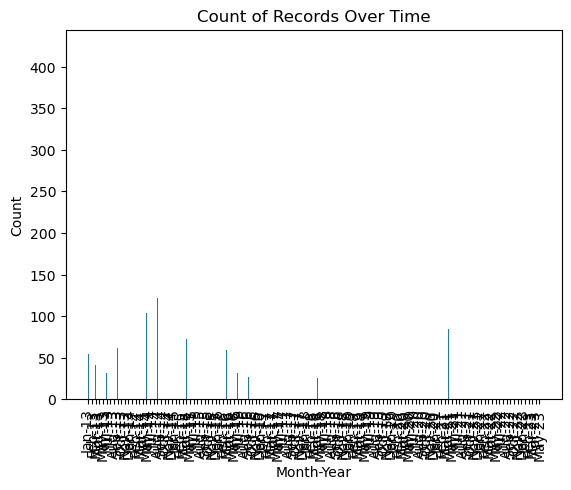

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the "datetime" column to a datetime type
df['date'] = pd.to_datetime(df['date'])

# Extract the month and year information from the datetime column
df['month_year'] = df['date'].dt.strftime("%b-%y")

# Group the data by the extracted month and year information
grouped = df.groupby(['month_year'])

# Get the count of records in each group
count = grouped.size().reset_index(name='count')

# Convert the month_year column to a datetime type
count['month_year'] = pd.to_datetime(count['month_year'], format="%b-%y")

# Sort the month_year column in ascending order
count = count.sort_values(by='month_year')

# Create a bar plot of the count of records
plt.bar(count['month_year'], count['count'], linewidth=20)
plt.xlabel("Month-Year")
plt.ylabel("Count")
plt.title("Count of Records Over Time")
plt.xticks(count['month_year'], count['month_year'].dt.strftime("%b-%y"), rotation=90)
plt.show()

In [151]:
# !python -m spacy download uk_core_news_lg

In [163]:
invalid_strings = set()
invalid_count = 0
total_count = len(df['fulltext'])
for text in df['fulltext']:
    if not isinstance(text, str):
        invalid_count += 1
        invalid_strings.add(text)
        continue

percentage = (invalid_count / total_count) * 100

print(f"Number of invalid strings: {invalid_count} ({percentage:.2f}%)")
print("First 20 unique invalid strings:")
for i, invalid_string in enumerate(invalid_strings):
    if i >= 20:
        break
    print(f"{i + 1}. {invalid_string}")

Number of invalid strings: 0 (0.00%)
First 20 unique invalid strings:


In [153]:
nan_count = df['fulltext_clean'].isna().sum()
print(f'There are {nan_count} NaN values in the fulltext_clean column.')

There are 0 NaN values in the fulltext_clean column.


In [154]:
print(df['fulltext_clean'].apply(type).value_counts())

fulltext_clean
<class 'str'>    7695
Name: count, dtype: int64


In [155]:
from tqdm.auto import tqdm
import spacy
import pandas as pd

# Load spaCy model for sentence splitting
nlp = spacy.load("uk_core_news_lg")

# Make sure spaCy uses the tqdm progress bar
tqdm.pandas()

# Define the function to split paragraphs into sentences
def split_into_sentences(para):
    doc = nlp(para)
    return [sent.text for sent in doc.sents]

# Create a paragraph-based dataframe
df['fulltext_clean'] = df['fulltext_clean'].str.split('\n')
df_paras = df.explode('fulltext_clean').reset_index().rename(columns={'index': 'id_doc', 'fulltext_clean': 'text_para'})

# Split paragraphs into sentences
df_paras['text_para'] = df_paras['text_para'].progress_apply(split_into_sentences)

# Create a sentence-based dataframe
df_sents = df_paras.explode('text_para').reset_index().rename(columns={'index': 'id_para', 'text_para': 'text_sent'})

# Save dataframes
df_paras[['id_doc', 'text_para']].to_csv('230528/df_paras.csv', index=False)
df_sents[['id_doc', 'id_para', 'text_sent']].to_csv('230528/df_sents.csv', index=False)


  0%|          | 0/170545 [00:00<?, ?it/s]

In [156]:
import pandas as pd

# Assumption: df, df_paras, df_sents are already loaded in memory

# Define a function to get statistics of a dataframe
def get_stats(df, col_name):
    stats = {
        'count': df.shape[0],
        'max_len': df[col_name].str.len().max(),
        'min_len': df[col_name].str.len().min(),
        'avg_len': df[col_name].str.len().mean()
    }
    return stats

# Get statistics for each dataframe
doc_stats = get_stats(df, 'fulltext_clean')
para_stats = get_stats(df_paras, 'text_para')
sent_stats = get_stats(df_sents, 'text_sent')

# Create a summary dataframe
df_stats = pd.DataFrame([doc_stats, para_stats, sent_stats], 
                          index=['documents', 'paragraphs', 'sentences'])

# Save dataframe to a csv file
df_stats.to_csv('230528/230528 Integrum Resilience Ukrainian - stats.csv')

# Display the summary
print(df_stats)

             count  max_len  min_len    avg_len
documents     7695    754.0      1.0  22.163093
paragraphs  170545    166.0      0.0   2.008408
sentences   343293   3509.0      1.0  93.797562


In [160]:
import spacy
import pandas as pd
from tqdm.auto import tqdm
import cupy

# Load the Ukrainian model and use GPU
spacy.require_gpu()
nlp = spacy.load("uk_core_news_lg")

# Convert the float values in the 'text_sent' column to strings
df_sents['text_sent'] = df_sents['text_sent'].astype(str)

# Create empty lists to store lemmas, named entities
lemmas = []
named_entities = []

# Use tqdm to display a progress bar
for doc in tqdm(nlp.pipe(df_sents['text_sent'], batch_size=1000), desc='Processing text', total=len(df_sents)):
    # Skip docs where the text is not a string
    if not isinstance(doc.text, str):
        lemmas.append(None)
        named_entities.append(None)
        continue
    
    # Extract the lemmas
    lemmas.append([token.lemma_ for token in doc])

    # Extract the named entities
    entities = [(ent.label_, ent.text) for ent in doc.ents]
    named_entities.append(entities)
    
# Add the new data to the DataFrame
df_sents['text_lemma'] = lemmas
df_sents['named_entities'] = named_entities

# Save dataframes
df_sents[['id_doc', 'id_para', 'text_sent', 'text_lemma', 'named_entities']].to_csv('230528/df_sents_NEs.csv', index=False)

Processing text:   0%|          | 0/343293 [00:00<?, ?it/s]

In [164]:
df_sents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343293 entries, 0 to 343292
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id_para         343293 non-null  int64         
 1   id_doc          343293 non-null  int64         
 2   name            343293 non-null  object        
 3   fulltext        343293 non-null  object        
 4   database        343221 non-null  object        
 5   source          343293 non-null  object        
 6   date            343221 non-null  datetime64[ns]
 7   issue           343221 non-null  object        
 8   title           343293 non-null  object        
 9   text_sent       343293 non-null  object        
 10  author          343293 non-null  object        
 11  issue_number    343293 non-null  object        
 12  month_year      343221 non-null  object        
 13  text_lemma      343293 non-null  object        
 14  named_entities  343293 non-null  obj

In [161]:
df_sents.head()

,id_para,id_doc,name,fulltext,database,source,date,issue,title,text_sent,author,issue_number,month_year,text_lemma,named_entities
0,0,0,У Тростянці знайшли докази планів рф окупувати всю Україну,"У Тростянці знайшли докази планів рф окупувати всю Україну\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 11.05.2022\nУ Тростянці знайшли докази планів рф окупувати всю Україну\nОлена ЧЕРКАСЕЦЬ\nСлідчі ДБР виявили документи, у яких були докази, що росія мала наміри захопити всю Україну (Фото ДБР)\nСлідчі Державного бюро розслідувань у Тростянці, що на Сумщині, знайшли документи російських військових, що свідчать про наміри РФ захопити всю Україну.\nЯк інформує Укр...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",2022-05-11,11 мая,У Тростянці знайшли докази планів рф окупувати всю Україну,"Слідчі ДБР виявили документи, у яких були докази, що росія мала наміри захопити всю Україну (Фото ДБР)",Олена ЧЕРКАСЕЦЬ,,May-22,"[слідчий, дбр, виявити, документ, ,, у, який, бути, доказ, ,, що, росія, мати, намір, захопити, ввесь, україна, (, фото, дбр, )]","[(ORG, ДБР), (LOC, росія), (LOC, Україну), (ORG, ДБР)]"
1,1,0,У Тростянці знайшли докази планів рф окупувати всю Україну,"У Тростянці знайшли докази планів рф окупувати всю Україну\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 11.05.2022\nУ Тростянці знайшли докази планів рф окупувати всю Україну\nОлена ЧЕРКАСЕЦЬ\nСлідчі ДБР виявили документи, у яких були докази, що росія мала наміри захопити всю Україну (Фото ДБР)\nСлідчі Державного бюро розслідувань у Тростянці, що на Сумщині, знайшли документи російських військових, що свідчать про наміри РФ захопити всю Україну.\nЯк інформує Укр...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",2022-05-11,11 мая,У Тростянці знайшли докази планів рф окупувати всю Україну,"Слідчі Державного бюро розслідувань у Тростянці, що на Сумщині, знайшли документи російських військових, що свідчать про наміри РФ захопити всю Україну.",Олена ЧЕРКАСЕЦЬ,,May-22,"[слідчий, державний, бюро, розслідування, у, тростянка, ,, що, на, сумщина, ,, знайти, документ, російський, військовий, ,, що, свідчити, про, намір, рф, захопити, ввесь, україна, .]","[(ORG, Державного бюро розслідувань), (LOC, Тростянці), (LOC, Сумщині), (LOC, РФ), (LOC, Україну)]"
2,2,0,У Тростянці знайшли докази планів рф окупувати всю Україну,"У Тростянці знайшли докази планів рф окупувати всю Україну\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 11.05.2022\nУ Тростянці знайшли докази планів рф окупувати всю Україну\nОлена ЧЕРКАСЕЦЬ\nСлідчі ДБР виявили документи, у яких були докази, що росія мала наміри захопити всю Україну (Фото ДБР)\nСлідчі Державного бюро розслідувань у Тростянці, що на Сумщині, знайшли документи російських військових, що свідчать про наміри РФ захопити всю Україну.\nЯк інформує Укр...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",2022-05-11,11 мая,У Тростянці знайшли докази планів рф окупувати всю Україну,"Як інформує Україна молода, про це повідомляє пресслужба ДБР у Телеграмі.",Олена ЧЕРКАСЕЦЬ,,May-22,"[як, інформувати, україна, молодий, ,, про, це, повідомляти, пресслужба, дбр, у, телеграм, .]","[(LOC, Україна), (ORG, ДБР)]"
3,3,0,У Тростянці знайшли докази планів рф окупувати всю Україну,"У Тростянці знайшли докази планів рф окупувати всю Україну\nИсточник: Украина молода (Киев, Украина) (umoloda.kiev.ua)\nДата выпуска: 11.05.2022\nУ Тростянці знайшли докази планів рф окупувати всю Україну\nОлена ЧЕРКАСЕЦЬ\nСлідчі ДБР виявили документи, у яких були докази, що росія мала наміри захопити всю Україну (Фото ДБР)\nСлідчі Державного бюро розслідувань у Тростянці, що на Сумщині, знайшли документи російських військових, що свідчать про наміри РФ захопити всю Україну.\nЯк інформує Укр...",Зарубежные интернет-издания,"Украина молода (Киев, Украина) (umoloda.kiev.ua)",2022-05-11,11 мая,У Тростянці знайшли докази п

In [89]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Load the model
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Convert the float values in the 'fulltext' column to strings
df['fulltext_clean'] = df['fulltext_clean'].astype(str)

# Create an empty list to store the embeddings
embeddings = []

# Use tqdm to display a progress bar
for text in tqdm(df['fulltext_clean'], desc='Generating embeddings'):
    if not isinstance(text, str):
        continue
    # Compute the embedding
    embedding = model.encode([text])
    
    # Add the embedding to the list
    embeddings.append(embedding)

# Convert the list of embeddings to a numpy array
embeddings = np.array(embeddings)

# Save the embeddings to a file
np.save('230528/embeddings.npy', embeddings)

Generating embeddings:   0%|          | 0/7678 [00:00<?, ?it/s]

In [90]:
# Use tqdm to display a progress bar
for text in tqdm(df_sents['fulltext_lemma'], desc='Processing text'):
    # Skip rows where the text is not a string
    if not isinstance(text, str):
        named_entities.append(None)
        continue

    # Process the lemmatized text with spaCy
    doc = nlp(' '.join(text)) # join the lemmas back into a single string
    
    # Extract the named entities
    entities = [(ent.label_, ent.text) for ent in doc.ents]
    named_entities.append(entities)

# Add the new data to the DataFrame
df_sents['named_entities_2'] = named_entities

Processing text:   0%|          | 0/349781 [00:00<?, ?it/s]

ValueError: Length of values (699562) does not match length of index (349781)

In [92]:
# Create an empty list to store the lemmatized named entities
lemmatized_named_entities = []

# Use tqdm to display a progress bar
for entities in tqdm(df_sents['named_entities_2'], desc='Lemmatizing named entities'):
    # Skip rows where the entities are None
    if entities is None:
        lemmatized_named_entities.append(None)
        continue

    # Lemmatize each named entity
    lemmatized_entities = []
    for (label, text) in entities:
        doc = nlp(text)
        lemmas = [token.lemma_ for token in doc]
        lemmatized_entities.append((label, ' '.join(lemmas)))
    
    lemmatized_named_entities.append(lemmatized_entities)

# Add the lemmatized named entities to the DataFrame as a new column
df_sents['named_entities_3'] = lemmatized_named_entities

KeyError: 'named_entities_2'